# 🧠 Computer Vision – Lecture 6  
# 🎯 Topic: Train Helmet Detection Model (A–Z Practical Lab)

Instructor : Azeem Aslam<br>
Duration: 2 Hours<br>
Goal: Students will train their own working Helmet Detection AI Model

# 🔷 LAB OBJECTIVE

By the end of this lab, students will:

* Collect helmet dataset
* Use Roboflow for annotation
* Export YOLO format dataset
* Train YOLOv8 model
* Evaluate performance
* Test model
* Submit results like real AI engineers

This is a real industry workflow.

# 🔶 PART 1 — Why We Use Roboflow?

### ❓ What is Roboflow?

Roboflow is an online tool used for:

* Image annotation (drawing bounding boxes)
* Dataset management
* Train/Validation split
* Format conversion (YOLO, COCO, Pascal VOC)
* Data augmentation

### ❓ Why Not Manually Create Labels?

Because:

* Manual annotation formatting is error-prone
* YOLO requires specific normalized format
* Splitting data manually is risky

Companies use tools like:

* Roboflow
* CVAT
* LabelImg

Roboflow is easiest for students.


# 🔷 PART 2 — Dataset Preparation (Roboflow Workflow)

## Step 1: Create Roboflow Account

Go to:

👉 [https://roboflow.com](https://roboflow.com)

Sign up with Gmail.


## Step 2: Create New Project

Click:

Create New Project

Project Settings:

* Name: Helmet Detection
* Type: Object Detection
* Annotation Group: Bounding Box
* Image Upload: Upload helmet images

## Step 3: Upload Images

Students must collect:

Minimum:

* 200–300 images

Better:

* 500+ images

Include:

* Different angles
* Different lighting
* Multiple people
* Both helmet and no_helmet

## Step 5: Generate Dataset

After annotation:

Click:

Generate Dataset

Settings:

* Train: 80%
* Validation: 20%
* Preprocessing: Resize 640x640
* Augmentation: (Optional but recommended)

Enable:

* Flip
* Rotation
* Brightness

Then click:

Generate

## Step 6: Export Dataset

Choose format:

👉 YOLOv8 PyTorch

Download zip file.

Extract it.

Folder structure will look like:

```
Helmet-Detection-1/
 ├── train/
 │   ├── images/
 │   ├── labels/
 ├── valid/
 │   ├── images/
 │   ├── labels/
 ├── data.yaml
```


# 🔷 PART 3 — Setup in Jupyter Notebook

Now real lab starts.


## Step 1: Install Required Libraries

In Jupyter:

In [ ]:
!pip install ultralytics

In [ ]:
!pip install opencv-python

Restart kernel if required.

## Step 2: Import Libraries

In [1]:
import os

In [2]:
from ultralytics import YOLO

In [3]:
import cv2

In [6]:
import matplotlib.pyplot as plt

## Step 3: Check Dataset Path

Place extracted dataset folder in same directory as notebook.

Example:

```
project_folder/
   notebook.ipynb
   Helmet-Detection-1/
```


# 🔷 PART 4 — Professional Training

## Step 1: Load Pretrained Model (Transfer Learning)

In [19]:
model = YOLO("OpenCV/yolov8n.pt")

Why yolov8n?

* Small
* Fast
* Good for lab training


# 🔹 DATASET VALIDATION SCRIPT

Students must check before training. 



In [20]:
train_images = os.listdir("Helmet_Detection-1/train/images")
train_labels = os.listdir("Helmet_Detection-1/train/labels")

print("Train Images:", len(train_images))
print("Train Labels:", len(train_labels))

Train Images: 386
Train Labels: 386


## Step 2: Start Training

In [8]:
model.train(
    data = "Helmet_Detection-1/data.yaml",
    epochs=90,
    imgsz=512,
    batch=16,
    patience=15
)

Ultralytics 8.4.12  Python-3.13.9 torch-2.10.0+cpu CPU (13th Gen Intel Core i7-1355U)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Helmet_Detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=OpenCV/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, pers

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000022B80ABD550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

**Explaination**:

epochs = full passes<br>
batch = images processed at once<br>
patience = stop if no improvement<br>
imgsz = image size

# 🔷 PART 5 — Understanding Training Output

After training:

Check folder:

```
runs/detect/train/
```

Important files:

* best.pt
* results.png
* confusion_matrix.png


# 🔷 PART 6 — Understanding Metrics (Explain in Lab)

### Precision

Out of predicted helmets,
how many were correct?

### Recall

Out of real helmets,
how many detected?

### mAP50

Overall detection score.

Industry standard:

* 0.70+ Good
* 0.85+ Excellent

# 🔷 PART 7 — Testing Trained Model

Load best model:


In [4]:
model = YOLO("runs/detect/train/weights/best.pt")

results = model.predict(
    source="test.jpg",
    conf=0.4,
    save=True
)


image 1/1 C:\Users\User\OpenCV\Lecture 6\test.jpg: 384x512 1 helmet, 263.2ms
Speed: 103.0ms preprocess, 263.2ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 512)
Results saved to C:\Users\User\OpenCV\Lecture 6\runs\detect\predict3


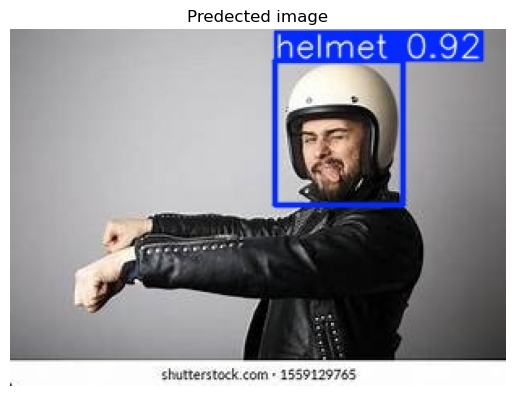

In [11]:
img = cv2.imread("runs/detect/predict2/test.jpg")

if img is not None:
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predected image")
    plt.show()
else:
    print("Image not load.")

# 🔷 PART 8 — Real-Time Webcam Test

In [17]:
model.predict(source=0, show=True)



1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)

WARNING 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 384x512 1 helmet, 261.6ms
0: 384x512 2 helmets, 318.2ms
0: 384x512 1 helmet, 256.8ms
0: 384x512 1 helmet, 274.3ms
0: 384x512 1 helmet, 177.1ms
0: 384x512 1 helmet, 157.4ms
0: 384x512 1 helmet, 162.3ms
0: 384x512 1 helmet, 175.2ms
0: 384x512 2 helmets, 152.3ms
Speed: 4.9ms preprocess, 209.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 512)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'helmet'}
 obb: None
 orig_img: array([[[227, 216, 222],
         [228, 218, 224],
         [224, 215, 221],
         ...,
         [238, 238, 238],
         [238, 238, 238],
         [237, 237, 237]],
 
        [[227, 217, 223],
         [226, 217, 223],
         [221, 214, 219],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],
 
        [[226, 217, 223],
         [225, 216, 222],
         [221, 215, 220],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [238, 238, 238]],
 
        ...,
 
        [[234, 234, 234],
         [234, 234, 234],
         [234, 234, 234],
         ...,
         [ 86,  76,  77],
         [ 82,  73,  73],
         [ 82,  75,  73]],
 
        [[233, 233, 233],
         [234, 234, 234],
         [235, 235, 235],
         ...,
         [ 86,  76

# 🔷 PART 9 — Overfitting Analysis

Ask students:

Compare:

Train mAP<br>
Validation mAP

If big difference → Overfitting

Solutions:

* More data
* Better augmentation
* Reduce epochs


# 🔷 PART 10 — Professional Improvement

Try:

In [21]:
model.train(
    data="Helmet_Detection-1/data.yaml",
    epochs=70,
    imgsz=640,
    batch=8,
    lr0=0.001,
    patience=20
)

Ultralytics 8.4.12  Python-3.13.9 torch-2.10.0+cpu CPU (13th Gen Intel Core i7-1355U)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Helmet_Detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=OpenCV/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, per

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000022BDC7BB850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [20]:
model = YOLO("runs/detect/train2/weights/best.pt")

results = model.predict(
    source="test2.jpg",
    conf=0.4,
    save=True
)


image 1/1 C:\Users\User\OpenCV\Lecture 6\test2.jpg: 384x640 1 helmet, 287.9ms
Speed: 5.3ms preprocess, 287.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\User\OpenCV\Lecture 6\runs\detect\predict7


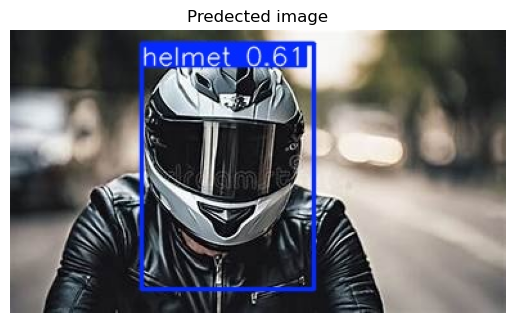

In [21]:
img = cv2.imread("runs/detect/predict7/test2.jpg")

if img is not None:
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predected image")
    plt.show()
else:
    print("Image not load.")

# 🔷 PART 11 — Interview Level Questions

## 🔷 What is Transfer Learning?

**Transfer learning** ka matlab hai:
pehle se trained model (jaise YOLO trained on COCO dataset) ko use karke **apne custom dataset par training karna**.

➡️ Model already basic features (edges, shapes, patterns) seekh chuka hota hai
➡️ Hum sirf usay **apne task ke liye fine-tune** karte hain

**Benefit:**

* Training fast hoti hai
* Kam data me bhi acha result
* Less computation required

---

## 🔷 Why Do We Split Dataset?

Dataset ko split kiya jata hai **model ki real performance check karne ke liye**.

Normally:

* **Train set** → model seekhta hai
* **Validation set** → training ke dauran check hota hai
* **Test set** → final evaluation

**Reason:**
Agar train aur test same hon → model sirf data yaad kar leta hai
Split karne se **generalization** check hoti hai.

---

## 🔷 What is mAP?

**mAP (mean Average Precision)** ek metric hai jo batata hai:

👉 Model **kitni accuracy se objects detect + classify** kar raha hai

YOLO me:

* **mAP50** → IoU threshold 0.5
* **mAP50–95** → strict evaluation (real-world quality)

Higher mAP = better model

---

## 🔷 What Causes Overfitting?

Overfitting tab hoti hai jab model:

❌ Training data ko yaad kar leta hai
❌ New / unseen data par fail ho jata hai

**Main reasons:**

* Dataset chhota hona
* Zyada epochs
* Model zyada complex
* No data augmentation

**Solution:**

* More data
* Early stopping
* Regularization
* Data augmentation

---

## 🔷 Why Use Roboflow?

**Roboflow** is used for:

✔ Dataset management
✔ Easy annotation (bounding boxes)
✔ Automatic YOLO format export
✔ Dataset splitting (train / val / test)
✔ Resize & augmentation

**Why beginners love it:**

* No manual folder headache
* Clean & industry-standard datasets
* Saves time + avoids mistakes

---

### 🎯 Interview Tip (One-liner memory trick)

> “Good data + correct split + proper metrics + transfer learning = strong CV model.”



# 🔷 FINAL INDUSTRY MESSAGE

Before:

“Model chal gaya 👍”

Now:

“What is validation mAP?”
“How can we improve recall?”
“Is model generalizing?”

That is AI Engineer thinking.


# 🚀 What Students Achieved Today

They:

✅ Used professional annotation tool<br>
✅ Managed dataset properly<br>
✅ Trained YOLO model<br>
✅ Evaluated performance<br>
✅ Tested model live<br>

This is real-world AI workflow.